# Solving the Bellman equation with a numerical solver

<a href="https://www.youtube.com/watch?v=ookYeokJPiA">
  <img src="https://img.shields.io/badge/youtube-firebrick?style=for-the-badge&logo=youtube&logoColor=white" alt="YouTube Badge"/>
</a>

<p style="font-size:10px">This work is licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0) license.</p>

<p style="font-size:10px">Kamila Zdybał, <a href="https://kamilazdybal.github.io/">Science Docs</a>, 2024</p>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_environment(quantity, n_x, n_y, origin='upper', figsize=(4,3), annotate=True, fontsize=20):

    plt.figure(figsize=figsize)
    plt.imshow(quantity, origin=origin, cmap='coolwarm', vmin=-1, vmax=1)
    for axis in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[axis].set_linewidth(2)
    plt.gca().set_xticks(np.arange(n_x + 1) - .5, minor=True)
    plt.gca().set_yticks(np.arange(n_y + 1) - .5, minor=True)
    plt.xticks([i for i in range(0,n_x)])
    plt.yticks([i for i in range(0,n_y)])
    plt.gca().grid(which="minor", color="black", linewidth=1)
    plt.gca().tick_params(which="minor", bottom=False, left=False)
    # plt.xlabel('x', fontsize=12)
    # plt.ylabel('y', fontsize=12, rotation=0, horizontalalignment='right')
    if annotate:
        for i in range(n_y):
            for j in range(n_x):
                text = plt.text(j, i, round(quantity[i, j], 3), fontsize=fontsize, ha="center", va="center", color="w")
    
    return plt

***

## Very small environment

In [3]:
discount = 0.9
n_width = 3
n_height = 2
n_states = n_width * n_height

In [4]:
environment = np.zeros((n_height, n_width))

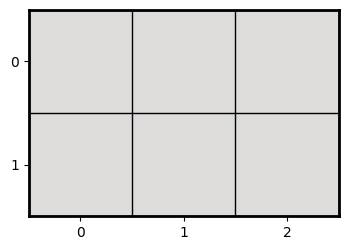

In [5]:
plt = plot_environment(environment, n_width, n_height, annotate=False)
plt.savefig('small-RL-environement.pdf', dpi=300, bbox_inches='tight')

In [6]:
rewards_field = np.zeros_like(environment)
rewards_field[0,2] = 1

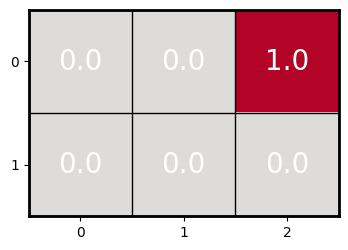

In [7]:
plt = plot_environment(rewards_field, n_width, n_height, annotate=True)
plt.savefig('small-RL-environement-rewards-field.pdf', dpi=300, bbox_inches='tight')

In [8]:
A = np.eye(n_states,n_states)
A[0,1] = -discount
A[1,2] = -discount
A[3,0] = -discount
A[4,1] = -discount
A[5,4] = -discount

In [9]:
A

array([[ 1. , -0.9,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. , -0.9,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ],
       [-0.9,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 0. , -0.9,  0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.9,  1. ]])

In [10]:
b = np.array([0,0,1,0,0,0])

In [11]:
b

array([0, 0, 1, 0, 0, 0])

In [12]:
value_function = np.linalg.solve(A, b)
value_function = np.reshape(value_function, (n_height, n_width))

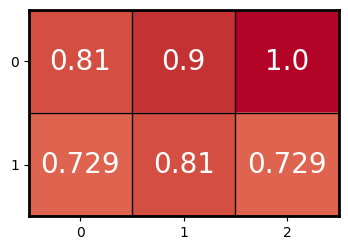

In [13]:
plt = plot_environment(value_function, n_width, n_height)
plt.savefig('small-RL-environement-with-value-function.pdf', dpi=300, bbox_inches='tight')

***